# **Mounting drive and Importing libraries**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/PRML/Project/framingham.csv'

In [0]:
#importing all the reqired libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# **Loading and Displaying Original data**

In [0]:
#loading the data
df = pd.read_csv(path)

In [0]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [0]:
#Checking the missing values 
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# **Displaying final processed data**



In [0]:
#dropping unwanted columns and removing null values
df.drop(['education'],axis=1,inplace=True)
df.dropna(axis=0,inplace=True)

In [0]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [0]:
#Checking the missing values 
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# **Analysing and Visualizing Data**
###**Data description**

In [0]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### **Plots of attributes with people having CHD**

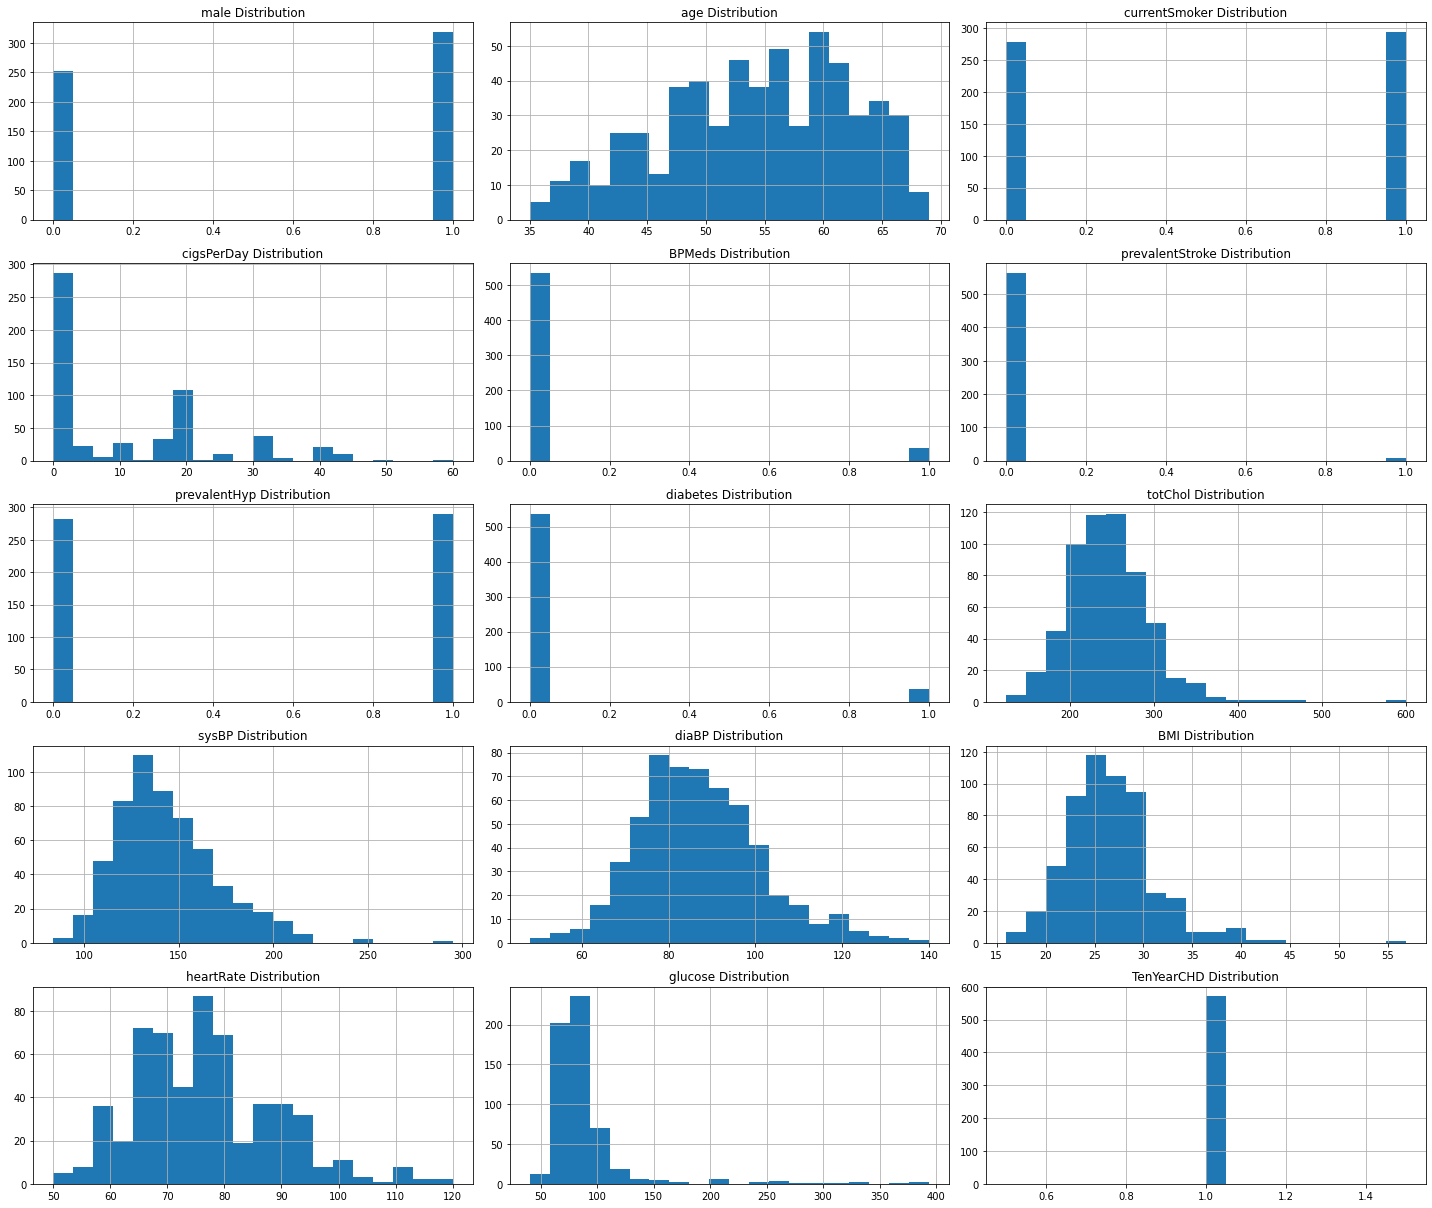

In [57]:
temp_df= df[df.TenYearCHD != 0]

def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax)
        ax.set_title(feature+" Distribution")
        
    fig.tight_layout()  
    plt.show()
draw_histograms(temp_df,temp_df.columns,6,3)

### **Correlation heat maps**

In [0]:
df.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024120,0.203861,0.326780,-0.052359,-0.002509,0.002987,0.011847,-0.067506,-0.044638,0.053602,0.074630,-0.115091,0.003236,0.096056
age,-0.024120,1.000000,-0.211427,-0.188611,0.131629,0.049990,0.305735,0.109257,0.260967,0.388558,0.205774,0.136093,-0.005857,0.118426,0.231414
currentSmoker,0.203861,-0.211427,1.000000,0.773166,-0.051828,-0.037582,-0.104753,-0.045319,-0.050025,-0.133098,-0.113915,-0.165165,0.054545,-0.054180,0.021722
cigsPerDay,0.326780,-0.188611,0.773166,1.000000,-0.046601,-0.035711,-0.066911,-0.039411,-0.030427,-0.092292,-0.056108,-0.090032,0.066726,-0.055165,0.056064
BPMeds,-0.052359,0.131629,-0.051828,-0.046601,1.000000,0.111595,0.263089,0.056322,0.089554,0.269507,0.199400,0.105090,0.010232,0.052442,0.084704
prevalentStroke,-0.002509,0.049990,-0.037582,-0.035711,0.111595,1.000000,0.065208,0.009417,0.012259,0.060431,0.055232,0.035550,-0.016675,0.015779,0.047669
prevalentHyp,0.002987,0.305735,-0.104753,-0.066911,0.263089,0.065208,1.000000,0.082096,0.165049,0.697960,0.616655,0.303382,0.142512,0.085959,0.178779
diabetes,0.011847,0.109257,-0.045319,-0.039411,0.056322,0.009417,0.082096,1.000000,0.047374,0.104415,0.051841,0.093061,0.063383,0.616084,0.093190
totChol,-0.067506,0.260967,-0.050025,-0.030427,0.089554,0.012259,0.165049,0.047374,1.000000,0.216572,0.170353,0.119398,0.094802,0.046769,0.089408
sysBP,-0.044638,0.388558,-0.133098,-0.092292,0.269507,0.060431,0.697960,0.104415,0.216572,1.000000,0.785909,0.330569,0.181482,0.132928,0.220170


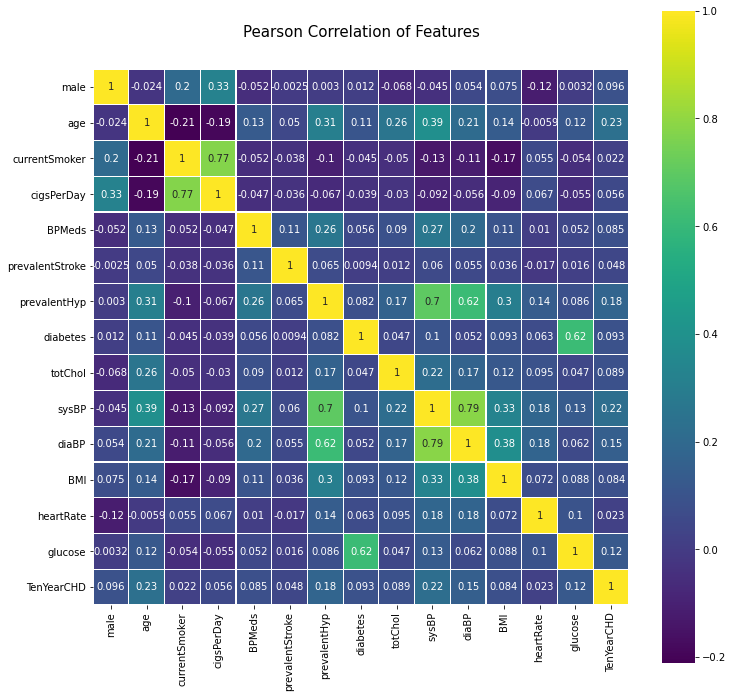

In [0]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white',annot=True)

# **Feature Selection**

In [0]:
from sklearn.feature_selection import SelectKBest,chi2

X= df[df.columns]
X= X.drop(columns=['TenYearCHD'])
Y=df['TenYearCHD']

test=SelectKBest(score_func=chi2,k=10)
fit=test.fit(X,Y)
print("scores =", fit.scores_, '\n')
print(X.columns)

scores = [ 19.19163022 297.28712136   0.90496472 185.9526138   26.08048533
   8.47123708  82.46133011  31.67166389 251.62848336 667.47469857
 143.27244253  17.05137241   3.63763461 402.0717868 ] 

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')


# **Logistic Regression**

### **Evaluating accuracy by considering different features**

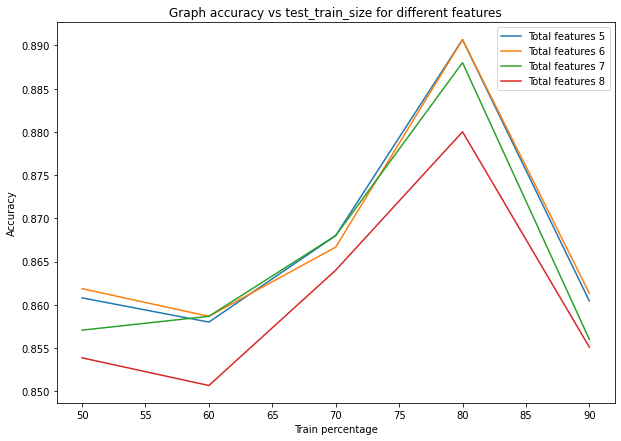

In [63]:
fig= plt.figure(figsize= (10,7))
itr = {0.5, 0.4, 0.3, 0.2, 0.1}
feat_itr = [['age','cigsPerDay','totChol','sysBP','glucose'],['age','cigsPerDay','totChol','sysBP','diaBP','glucose'], ['age','cigsPerDay','totChol','sysBP','diaBP','glucose','prevalentHyp'], ['age','cigsPerDay','totChol','sysBP','diaBP','glucose','prevalentHyp','diabetes']]
count= 0
train_percentage= [50, 60, 70, 80, 90]
accuracy= [0]*5
length=5
for j in feat_itr: 
    count = 0
    for i in itr:
        X=df[j]
        x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=i,random_state=5)
        logreg=LogisticRegression()
        logreg.fit(x_train,y_train)
        y_pred=logreg.predict(x_test)
        accuracy[count] = sklearn.metrics.accuracy_score(y_test,y_pred)
        count= count +1
    plt.plot(train_percentage, accuracy, label= 'Total features %s'%length)
    length= length+1
plt.xlabel("Train percentage")
plt.ylabel("Accuracy")
plt.title("Graph accuracy vs test_train_size for different features")
plt.legend()
plt.show()


### **Box Plot of important features**



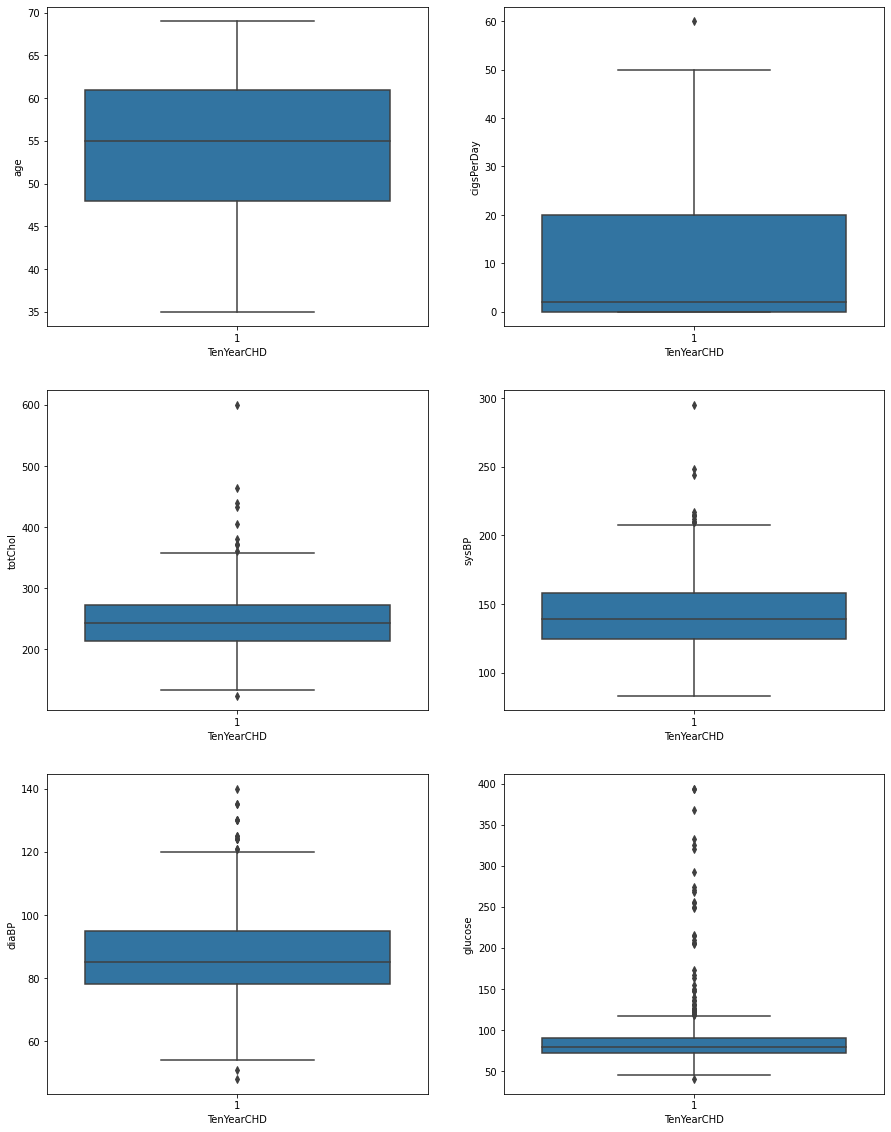

In [0]:
#boxplot of important attributes
fig, ax = plt.subplots(nrows= 3, ncols=2,figsize = (15,20))
sns.boxplot(temp_df.TenYearCHD,df.age, ax= ax[0,0])
sns.boxplot(temp_df.TenYearCHD,df.cigsPerDay, ax= ax[0,1])
sns.boxplot(temp_df.TenYearCHD,df.totChol, ax= ax[1,0])
sns.boxplot(temp_df.TenYearCHD,df.sysBP, ax= ax[1,1])
sns.boxplot(temp_df.TenYearCHD,df.diaBP, ax= ax[2,0])
sns.boxplot(temp_df.TenYearCHD,df.glucose, ax= ax[2,1])

### **Final Prediction using 6 features**

In [0]:
#splitting the data into training and testing set 80:20
#selecting attributes with high scores
X=df[['age','cigsPerDay','totChol','sysBP','diaBP','glucose']]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=5)

logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [61]:
#printing confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[644   3]
 [ 97   6]]


True Positives: 6

True Negatives: 644

False Positives: 3

False Negatives: 97 

In [62]:
#model accuracy with 6 features
result= sklearn.metrics.accuracy_score(y_test,y_pred)
print("Accuracy = ", result)

Accuracy =  0.8666666666666667
